In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 101,
    "ct": 101,
    "dx": 100,
    "dt": 602,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 10,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 10,
}
config.iterations = 10000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 1.0,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 17:55:36, Iteration: 100, Train Loss: 1.8711e+00, c1: 3.0917e-01, c2: 1.4792e-03, d1: 1.0540e+00, d2: 5.0647e-01, l1_reg: 3.4197e+02, l2_reg: 5.4104e+01
2020/09/03, 17:55:37, Iteration: 200, Train Loss: 1.1917e+00, c1: 1.3507e-01, c2: 3.6548e-03, d1: 5.4671e-01, d2: 5.0624e-01, l1_reg: 3.4357e+02, l2_reg: 5.5239e+01
2020/09/03, 17:55:38, Iteration: 300, Train Loss: 1.0495e+00, c1: 6.9573e-02, c2: 1.2665e-03, d1: 4.7104e-01, d2: 5.0760e-01, l1_reg: 3.4286e+02, l2_reg: 5.4877e+01
2020/09/03, 17:55:39, Iteration: 400, Train Loss: 1.1874e+00, c1: 2.2659e-01, c2: 9.7217e-04, d1: 4.5290e-01, d2: 5.0691e-01, l1_reg: 3.4085e+02, l2_reg: 5.3546e+01
2020/09/03, 17:55:40, Iteration: 500, Train Loss: 1.0393e+00, c1: 9.3551e-02, c2: 1.0234e-03, d1: 4.3837e-01, d2: 5.0634e-01, l1_reg: 3.4116e+02, l2_reg: 5.3918e+01
2020/09/03, 17:55:40, Iteration: 600, Train Loss: 1.0371e+00, c1: 1.0490e-01, c2: 2.9383e-03, d1: 4.2316e-01, d2: 5.0610e-01, l1_reg: 3.4130e+02, l2_reg: 5.4154e+01
2020/09/03

2020/09/03, 17:56:21, Iteration: 5100, Train Loss: 2.7523e-01, c1: 3.9763e-02, c2: 6.5964e-02, d1: 9.9102e-03, d2: 1.5959e-01, l1_reg: 4.0430e+02, l2_reg: 1.0140e+02
2020/09/03, 17:56:22, Iteration: 5200, Train Loss: 2.5849e-01, c1: 2.2833e-02, c2: 6.6357e-02, d1: 9.9809e-03, d2: 1.5931e-01, l1_reg: 4.0451e+02, l2_reg: 1.0156e+02
2020/09/03, 17:56:22, Iteration: 5300, Train Loss: 2.6316e-01, c1: 2.9922e-02, c2: 6.5479e-02, d1: 9.3062e-03, d2: 1.5845e-01, l1_reg: 4.0482e+02, l2_reg: 1.0183e+02
2020/09/03, 17:56:23, Iteration: 5400, Train Loss: 2.6365e-01, c1: 3.1886e-02, c2: 6.4588e-02, d1: 9.2048e-03, d2: 1.5797e-01, l1_reg: 4.0499e+02, l2_reg: 1.0197e+02
2020/09/03, 17:56:24, Iteration: 5500, Train Loss: 2.9373e-01, c1: 5.9636e-02, c2: 6.6557e-02, d1: 9.5667e-03, d2: 1.5796e-01, l1_reg: 4.0522e+02, l2_reg: 1.0214e+02
2020/09/03, 17:56:25, Iteration: 5600, Train Loss: 2.5054e-01, c1: 1.9750e-02, c2: 6.4929e-02, d1: 9.1174e-03, d2: 1.5674e-01, l1_reg: 4.0539e+02, l2_reg: 1.0226e+02
2020

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [3]:
config.iterations = 500000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 18:03:15, Iteration: 11000, Train Loss: 2.0024e-01, c1: 3.3954e-02, c2: 4.1509e-02, d1: 6.6425e-03, d2: 1.1813e-01, l1_reg: 4.2324e+02, l2_reg: 1.1523e+02
2020/09/03, 18:03:24, Iteration: 12000, Train Loss: 1.8224e-01, c1: 4.0052e-02, c2: 3.6262e-02, d1: 6.1973e-03, d2: 9.9725e-02, l1_reg: 4.2937e+02, l2_reg: 1.1918e+02
2020/09/03, 18:03:33, Iteration: 13000, Train Loss: 1.6922e-01, c1: 3.7939e-02, c2: 3.4701e-02, d1: 5.8785e-03, d2: 9.0695e-02, l1_reg: 4.3392e+02, l2_reg: 1.2270e+02
2020/09/03, 18:03:42, Iteration: 14000, Train Loss: 1.7145e-01, c1: 3.8129e-02, c2: 3.8401e-02, d1: 6.0523e-03, d2: 8.8864e-02, l1_reg: 4.3648e+02, l2_reg: 1.2509e+02
2020/09/03, 18:03:50, Iteration: 15000, Train Loss: 1.6273e-01, c1: 4.2983e-02, c2: 3.2737e-02, d1: 5.1530e-03, d2: 8.1848e-02, l1_reg: 4.3846e+02, l2_reg: 1.2710e+02
2020/09/03, 18:03:59, Iteration: 16000, Train Loss: 1.5994e-01, c1: 4.4084e-02, c2: 3.2377e-02, d1: 4.7680e-03, d2: 7.8703e-02, l1_reg: 4.4008e+02, l2_reg: 1.2885e+0

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/03, 18:04:44, Iteration: 21000, Train Loss: 1.2455e-01, c1: 2.3216e-02, c2: 2.8055e-02, d1: 4.4714e-03, d2: 6.8802e-02, l1_reg: 4.4530e+02, l2_reg: 1.3619e+02
2020/09/03, 18:04:52, Iteration: 22000, Train Loss: 1.3233e-01, c1: 3.4143e-02, c2: 2.7002e-02, d1: 4.4682e-03, d2: 6.6714e-02, l1_reg: 4.4630e+02, l2_reg: 1.3763e+02
2020/09/03, 18:05:01, Iteration: 23000, Train Loss: 1.3447e-01, c1: 3.7901e-02, c2: 2.6196e-02, d1: 4.3614e-03, d2: 6.6003e-02, l1_reg: 4.4726e+02, l2_reg: 1.3883e+02
2020/09/03, 18:05:10, Iteration: 24000, Train Loss: 1.3207e-01, c1: 3.4498e-02, c2: 2.7372e-02, d1: 4.5783e-03, d2: 6.5618e-02, l1_reg: 4.4853e+02, l2_reg: 1.4020e+02
2020/09/03, 18:05:19, Iteration: 25000, Train Loss: 1.2265e-01, c1: 3.0297e-02, c2: 2.5359e-02, d1: 4.1450e-03, d2: 6.2840e-02, l1_reg: 4.4973e+02, l2_reg: 1.4153e+02
2020/09/03, 18:05:28, Iteration: 26000, Train Loss: 1.1951e-01, c1: 2.8833e-02, c2: 2.4663e-02, d1: 4.1626e-03, d2: 6.1846e-02, l1_reg: 4.5096e+02, l2_reg: 1.4272e+0

2020/09/03, 18:12:06, Iteration: 71000, Train Loss: 7.7386e-02, c1: 1.9944e-02, c2: 1.3797e-02, d1: 3.3749e-03, d2: 4.0263e-02, l1_reg: 4.9103e+02, l2_reg: 1.9173e+02
2020/09/03, 18:12:15, Iteration: 72000, Train Loss: 8.5985e-02, c1: 2.4971e-02, c2: 1.5635e-02, d1: 3.2144e-03, d2: 4.2157e-02, l1_reg: 4.9167e+02, l2_reg: 1.9239e+02
2020/09/03, 18:12:24, Iteration: 73000, Train Loss: 9.0772e-02, c1: 3.2682e-02, c2: 1.4542e-02, d1: 2.7438e-03, d2: 4.0798e-02, l1_reg: 4.9230e+02, l2_reg: 1.9311e+02
2020/09/03, 18:12:33, Iteration: 74000, Train Loss: 7.8341e-02, c1: 2.3992e-02, c2: 1.2571e-02, d1: 2.9883e-03, d2: 3.8783e-02, l1_reg: 4.9282e+02, l2_reg: 1.9367e+02
2020/09/03, 18:12:41, Iteration: 75000, Train Loss: 8.4015e-02, c1: 2.8864e-02, c2: 1.2758e-02, d1: 2.9520e-03, d2: 3.9434e-02, l1_reg: 4.9337e+02, l2_reg: 1.9432e+02
2020/09/03, 18:12:50, Iteration: 76000, Train Loss: 8.9623e-02, c1: 3.0190e-02, c2: 1.4880e-02, d1: 3.9144e-03, d2: 4.0633e-02, l1_reg: 4.9390e+02, l2_reg: 1.9495e+0

2020/09/03, 18:19:19, Iteration: 120000, Train Loss: 6.7804e-02, c1: 1.9433e-02, c2: 9.6847e-03, d1: 3.4484e-03, d2: 3.5230e-02, l1_reg: 5.1607e+02, l2_reg: 2.2038e+02
2020/09/03, 18:19:28, Iteration: 121000, Train Loss: 7.7813e-02, c1: 2.8355e-02, c2: 1.0740e-02, d1: 2.7326e-03, d2: 3.5978e-02, l1_reg: 5.1644e+02, l2_reg: 2.2090e+02
2020/09/03, 18:19:37, Iteration: 122000, Train Loss: 7.7211e-02, c1: 2.8067e-02, c2: 1.0230e-02, d1: 3.9254e-03, d2: 3.4981e-02, l1_reg: 5.1690e+02, l2_reg: 2.2143e+02
2020/09/03, 18:19:45, Iteration: 123000, Train Loss: 7.1590e-02, c1: 2.4303e-02, c2: 9.1003e-03, d1: 3.1206e-03, d2: 3.5059e-02, l1_reg: 5.1731e+02, l2_reg: 2.2197e+02
2020/09/03, 18:19:54, Iteration: 124000, Train Loss: 7.6209e-02, c1: 2.8265e-02, c2: 9.9262e-03, d1: 2.8585e-03, d2: 3.5152e-02, l1_reg: 5.1778e+02, l2_reg: 2.2246e+02
2020/09/03, 18:20:03, Iteration: 125000, Train Loss: 8.0610e-02, c1: 3.2245e-02, c2: 1.0232e-02, d1: 2.7482e-03, d2: 3.5377e-02, l1_reg: 5.1811e+02, l2_reg: 2.2

2020/09/03, 18:26:32, Iteration: 169000, Train Loss: 6.7002e-02, c1: 1.8822e-02, c2: 9.8023e-03, d1: 3.2379e-03, d2: 3.5131e-02, l1_reg: 5.2716e+02, l2_reg: 2.3978e+02
2020/09/03, 18:26:41, Iteration: 170000, Train Loss: 7.2426e-02, c1: 2.4886e-02, c2: 9.9506e-03, d1: 2.5169e-03, d2: 3.5065e-02, l1_reg: 5.2707e+02, l2_reg: 2.4009e+02
2020/09/03, 18:26:49, Iteration: 171000, Train Loss: 6.2469e-02, c1: 1.6842e-02, c2: 8.5919e-03, d1: 2.6935e-03, d2: 3.4335e-02, l1_reg: 5.2717e+02, l2_reg: 2.4041e+02
2020/09/03, 18:26:58, Iteration: 172000, Train Loss: 7.8760e-02, c1: 3.0147e-02, c2: 9.9171e-03, d1: 3.2416e-03, d2: 3.5447e-02, l1_reg: 5.2723e+02, l2_reg: 2.4074e+02
2020/09/03, 18:27:07, Iteration: 173000, Train Loss: 5.6915e-02, c1: 1.2455e-02, c2: 7.4662e-03, d1: 3.8238e-03, d2: 3.3162e-02, l1_reg: 5.2732e+02, l2_reg: 2.4103e+02
2020/09/03, 18:27:16, Iteration: 174000, Train Loss: 7.6400e-02, c1: 3.0183e-02, c2: 8.6853e-03, d1: 3.2649e-03, d2: 3.4259e-02, l1_reg: 5.2744e+02, l2_reg: 2.4

2020/09/03, 18:33:44, Iteration: 218000, Train Loss: 6.1068e-02, c1: 1.7790e-02, c2: 7.1259e-03, d1: 3.0887e-03, d2: 3.3055e-02, l1_reg: 5.3969e+02, l2_reg: 2.5809e+02
2020/09/03, 18:33:53, Iteration: 219000, Train Loss: 6.3374e-02, c1: 1.8982e-02, c2: 7.8409e-03, d1: 3.3062e-03, d2: 3.3237e-02, l1_reg: 5.3988e+02, l2_reg: 2.5844e+02
2020/09/03, 18:34:01, Iteration: 220000, Train Loss: 7.0484e-02, c1: 2.7382e-02, c2: 7.1011e-03, d1: 3.1667e-03, d2: 3.2827e-02, l1_reg: 5.4010e+02, l2_reg: 2.5883e+02
2020/09/03, 18:34:10, Iteration: 221000, Train Loss: 6.6378e-02, c1: 2.3377e-02, c2: 7.3396e-03, d1: 2.7750e-03, d2: 3.2878e-02, l1_reg: 5.4019e+02, l2_reg: 2.5908e+02
2020/09/03, 18:34:19, Iteration: 222000, Train Loss: 6.9556e-02, c1: 2.5578e-02, c2: 7.4848e-03, d1: 3.3118e-03, d2: 3.3173e-02, l1_reg: 5.4045e+02, l2_reg: 2.5939e+02
2020/09/03, 18:34:28, Iteration: 223000, Train Loss: 6.5376e-02, c1: 2.1394e-02, c2: 7.7448e-03, d1: 2.9759e-03, d2: 3.3254e-02, l1_reg: 5.4061e+02, l2_reg: 2.5

2020/09/03, 18:40:57, Iteration: 267000, Train Loss: 6.4431e-02, c1: 2.2373e-02, c2: 6.7185e-03, d1: 2.8871e-03, d2: 3.2444e-02, l1_reg: 5.4601e+02, l2_reg: 2.7219e+02
2020/09/03, 18:41:05, Iteration: 268000, Train Loss: 6.4046e-02, c1: 2.2621e-02, c2: 6.2009e-03, d1: 3.3232e-03, d2: 3.1893e-02, l1_reg: 5.4624e+02, l2_reg: 2.7252e+02
2020/09/03, 18:41:15, Iteration: 269000, Train Loss: 6.0996e-02, c1: 1.9564e-02, c2: 6.5786e-03, d1: 2.8827e-03, d2: 3.1963e-02, l1_reg: 5.4626e+02, l2_reg: 2.7285e+02
2020/09/03, 18:41:24, Iteration: 270000, Train Loss: 6.1382e-02, c1: 1.8624e-02, c2: 7.0788e-03, d1: 3.3585e-03, d2: 3.2313e-02, l1_reg: 5.4651e+02, l2_reg: 2.7309e+02
2020/09/03, 18:41:32, Iteration: 271000, Train Loss: 6.4531e-02, c1: 2.2463e-02, c2: 6.6202e-03, d1: 3.2544e-03, d2: 3.2185e-02, l1_reg: 5.4661e+02, l2_reg: 2.7345e+02
2020/09/03, 18:41:41, Iteration: 272000, Train Loss: 8.0902e-02, c1: 3.7213e-02, c2: 7.4626e-03, d1: 3.0525e-03, d2: 3.3166e-02, l1_reg: 5.4688e+02, l2_reg: 2.7

2020/09/03, 18:48:10, Iteration: 316000, Train Loss: 6.5671e-02, c1: 2.4105e-02, c2: 6.4223e-03, d1: 3.6166e-03, d2: 3.1519e-02, l1_reg: 5.4999e+02, l2_reg: 2.8487e+02
2020/09/03, 18:48:18, Iteration: 317000, Train Loss: 5.8055e-02, c1: 1.7360e-02, c2: 6.1967e-03, d1: 2.8993e-03, d2: 3.1591e-02, l1_reg: 5.4960e+02, l2_reg: 2.8495e+02
2020/09/03, 18:48:27, Iteration: 318000, Train Loss: 5.3954e-02, c1: 1.4051e-02, c2: 5.7646e-03, d1: 2.6257e-03, d2: 3.1504e-02, l1_reg: 5.4945e+02, l2_reg: 2.8518e+02
2020/09/03, 18:48:36, Iteration: 319000, Train Loss: 6.0303e-02, c1: 1.9414e-02, c2: 6.0432e-03, d1: 3.3427e-03, d2: 3.1494e-02, l1_reg: 5.4945e+02, l2_reg: 2.8535e+02
2020/09/03, 18:48:45, Iteration: 320000, Train Loss: 5.4615e-02, c1: 1.3468e-02, c2: 6.3289e-03, d1: 3.1975e-03, d2: 3.1613e-02, l1_reg: 5.4927e+02, l2_reg: 2.8557e+02
2020/09/03, 18:48:54, Iteration: 321000, Train Loss: 5.7275e-02, c1: 1.5839e-02, c2: 6.7748e-03, d1: 2.9176e-03, d2: 3.1735e-02, l1_reg: 5.4929e+02, l2_reg: 2.8

2020/09/03, 18:55:23, Iteration: 365000, Train Loss: 6.3655e-02, c1: 2.2701e-02, c2: 6.7628e-03, d1: 2.7009e-03, d2: 3.1481e-02, l1_reg: 5.4053e+02, l2_reg: 2.9234e+02
2020/09/03, 18:55:31, Iteration: 366000, Train Loss: 6.6079e-02, c1: 2.4957e-02, c2: 6.6591e-03, d1: 3.4103e-03, d2: 3.1044e-02, l1_reg: 5.4006e+02, l2_reg: 2.9246e+02
2020/09/03, 18:55:40, Iteration: 367000, Train Loss: 5.7531e-02, c1: 1.6942e-02, c2: 6.1627e-03, d1: 2.7771e-03, d2: 3.1641e-02, l1_reg: 5.3992e+02, l2_reg: 2.9265e+02
2020/09/03, 18:55:49, Iteration: 368000, Train Loss: 5.4214e-02, c1: 1.3540e-02, c2: 6.4740e-03, d1: 2.8973e-03, d2: 3.1294e-02, l1_reg: 5.4040e+02, l2_reg: 2.9292e+02
2020/09/03, 18:55:58, Iteration: 369000, Train Loss: 5.4234e-02, c1: 1.4256e-02, c2: 5.8474e-03, d1: 2.7407e-03, d2: 3.1382e-02, l1_reg: 5.4028e+02, l2_reg: 2.9306e+02
2020/09/03, 18:56:07, Iteration: 370000, Train Loss: 6.4762e-02, c1: 2.5019e-02, c2: 5.7380e-03, d1: 2.7841e-03, d2: 3.1212e-02, l1_reg: 5.4031e+02, l2_reg: 2.9

2020/09/03, 19:02:37, Iteration: 414000, Train Loss: 5.6623e-02, c1: 1.7094e-02, c2: 5.7101e-03, d1: 2.4904e-03, d2: 3.1320e-02, l1_reg: 5.3396e+02, l2_reg: 2.9971e+02
2020/09/03, 19:02:46, Iteration: 415000, Train Loss: 6.1477e-02, c1: 2.0502e-02, c2: 5.9141e-03, d1: 3.5540e-03, d2: 3.1498e-02, l1_reg: 5.3389e+02, l2_reg: 2.9979e+02
2020/09/03, 19:02:55, Iteration: 416000, Train Loss: 6.0987e-02, c1: 2.0499e-02, c2: 5.9949e-03, d1: 3.2246e-03, d2: 3.1260e-02, l1_reg: 5.3355e+02, l2_reg: 2.9991e+02
2020/09/03, 19:03:03, Iteration: 417000, Train Loss: 5.9277e-02, c1: 1.9549e-02, c2: 5.7041e-03, d1: 2.7737e-03, d2: 3.1241e-02, l1_reg: 5.3353e+02, l2_reg: 3.0009e+02
2020/09/03, 19:03:12, Iteration: 418000, Train Loss: 6.6497e-02, c1: 2.5050e-02, c2: 6.8219e-03, d1: 3.3305e-03, d2: 3.1287e-02, l1_reg: 5.3289e+02, l2_reg: 3.0014e+02
2020/09/03, 19:03:21, Iteration: 419000, Train Loss: 5.1676e-02, c1: 1.3873e-02, c2: 4.5043e-03, d1: 2.5851e-03, d2: 3.0705e-02, l1_reg: 5.3279e+02, l2_reg: 3.0

2020/09/03, 19:09:50, Iteration: 463000, Train Loss: 5.0653e-02, c1: 1.1081e-02, c2: 5.5027e-03, d1: 3.1507e-03, d2: 3.0910e-02, l1_reg: 5.3360e+02, l2_reg: 3.0828e+02
2020/09/03, 19:09:59, Iteration: 464000, Train Loss: 6.6936e-02, c1: 2.7270e-02, c2: 6.0178e-03, d1: 3.1087e-03, d2: 3.0531e-02, l1_reg: 5.3266e+02, l2_reg: 3.0837e+02
2020/09/03, 19:10:08, Iteration: 465000, Train Loss: 6.7485e-02, c1: 2.6179e-02, c2: 6.4182e-03, d1: 3.7172e-03, d2: 3.1162e-02, l1_reg: 5.3277e+02, l2_reg: 3.0841e+02
2020/09/03, 19:10:17, Iteration: 466000, Train Loss: 5.2371e-02, c1: 1.3700e-02, c2: 4.6360e-03, d1: 3.3968e-03, d2: 3.0630e-02, l1_reg: 5.3148e+02, l2_reg: 3.0854e+02
2020/09/03, 19:10:26, Iteration: 467000, Train Loss: 5.0929e-02, c1: 1.2630e-02, c2: 4.5178e-03, d1: 3.3908e-03, d2: 3.0383e-02, l1_reg: 5.3094e+02, l2_reg: 3.0872e+02
2020/09/03, 19:10:35, Iteration: 468000, Train Loss: 5.9610e-02, c1: 1.9059e-02, c2: 6.2874e-03, d1: 3.1682e-03, d2: 3.1087e-02, l1_reg: 5.3079e+02, l2_reg: 3.0

In [5]:
config.iterations = 500000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/03, 19:27:29, Iteration: 511000, Train Loss: 6.0230e-02, c1: 2.1195e-02, c2: 5.3090e-03, d1: 3.2320e-03, d2: 3.0486e-02, l1_reg: 5.2566e+02, l2_reg: 3.1444e+02
2020/09/03, 19:27:38, Iteration: 512000, Train Loss: 5.5813e-02, c1: 1.8002e-02, c2: 4.6169e-03, d1: 2.7708e-03, d2: 3.0415e-02, l1_reg: 5.2383e+02, l2_reg: 3.1439e+02
2020/09/03, 19:27:47, Iteration: 513000, Train Loss: 5.8764e-02, c1: 1.9189e-02, c2: 5.7366e-03, d1: 2.5144e-03, d2: 3.1316e-02, l1_reg: 5.2418e+02, l2_reg: 3.1460e+02
2020/09/03, 19:27:56, Iteration: 514000, Train Loss: 5.5795e-02, c1: 1.6275e-02, c2: 4.9894e-03, d1: 3.9887e-03, d2: 3.0534e-02, l1_reg: 5.2418e+02, l2_reg: 3.1477e+02
2020/09/03, 19:28:05, Iteration: 515000, Train Loss: 5.5882e-02, c1: 1.7035e-02, c2: 5.4961e-03, d1: 2.9817e-03, d2: 3.0361e-02, l1_reg: 5.2303e+02, l2_reg: 3.1489e+02
2020/09/03, 19:28:14, Iteration: 516000, Train Loss: 5.4963e-02, c1: 1.6294e-02, c2: 4.7982e-03, d1: 3.4375e-03, d2: 3.0424e-02, l1_reg: 5.2244e+02, l2_reg: 3.1

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/03, 19:28:58, Iteration: 521000, Train Loss: 6.1835e-02, c1: 2.2367e-02, c2: 5.6138e-03, d1: 2.8914e-03, d2: 3.0955e-02, l1_reg: 5.2183e+02, l2_reg: 3.1569e+02
2020/09/03, 19:29:06, Iteration: 522000, Train Loss: 5.1037e-02, c1: 1.2708e-02, c2: 4.7649e-03, d1: 2.6663e-03, d2: 3.0889e-02, l1_reg: 5.2216e+02, l2_reg: 3.1586e+02
2020/09/03, 19:29:15, Iteration: 523000, Train Loss: 6.1074e-02, c1: 2.1460e-02, c2: 5.7137e-03, d1: 3.0803e-03, d2: 3.0812e-02, l1_reg: 5.2135e+02, l2_reg: 3.1595e+02
2020/09/03, 19:29:24, Iteration: 524000, Train Loss: 5.4622e-02, c1: 1.5696e-02, c2: 5.0840e-03, d1: 3.2968e-03, d2: 3.0536e-02, l1_reg: 5.2114e+02, l2_reg: 3.1611e+02
2020/09/03, 19:29:33, Iteration: 525000, Train Loss: 5.8970e-02, c1: 1.9817e-02, c2: 5.4789e-03, d1: 2.5825e-03, d2: 3.1083e-02, l1_reg: 5.2170e+02, l2_reg: 3.1626e+02
2020/09/03, 19:29:41, Iteration: 526000, Train Loss: 5.7736e-02, c1: 1.8001e-02, c2: 5.9654e-03, d1: 2.7010e-03, d2: 3.1060e-02, l1_reg: 5.2050e+02, l2_reg: 3.1

2020/09/03, 19:36:11, Iteration: 570000, Train Loss: 5.5886e-02, c1: 1.6855e-02, c2: 5.5551e-03, d1: 2.4478e-03, d2: 3.1020e-02, l1_reg: 5.1716e+02, l2_reg: 3.2303e+02
2020/09/03, 19:36:20, Iteration: 571000, Train Loss: 5.4586e-02, c1: 1.5347e-02, c2: 5.5353e-03, d1: 2.8951e-03, d2: 3.0800e-02, l1_reg: 5.1708e+02, l2_reg: 3.2324e+02
2020/09/03, 19:36:29, Iteration: 572000, Train Loss: 5.9022e-02, c1: 1.9844e-02, c2: 5.1705e-03, d1: 3.1079e-03, d2: 3.0891e-02, l1_reg: 5.1769e+02, l2_reg: 3.2342e+02
2020/09/03, 19:36:38, Iteration: 573000, Train Loss: 6.2064e-02, c1: 2.0184e-02, c2: 7.0625e-03, d1: 3.0010e-03, d2: 3.1808e-02, l1_reg: 5.1910e+02, l2_reg: 3.2367e+02
2020/09/03, 19:36:46, Iteration: 574000, Train Loss: 6.1700e-02, c1: 2.3840e-02, c2: 4.7388e-03, d1: 2.8886e-03, d2: 3.0224e-02, l1_reg: 5.1864e+02, l2_reg: 3.2376e+02
2020/09/03, 19:36:55, Iteration: 575000, Train Loss: 5.8848e-02, c1: 1.8185e-02, c2: 6.7338e-03, d1: 2.7890e-03, d2: 3.1131e-02, l1_reg: 5.1827e+02, l2_reg: 3.2

2020/09/03, 19:43:25, Iteration: 619000, Train Loss: 5.6760e-02, c1: 1.9667e-02, c2: 4.2612e-03, d1: 2.6382e-03, d2: 3.0185e-02, l1_reg: 5.1930e+02, l2_reg: 3.3105e+02
2020/09/03, 19:43:34, Iteration: 620000, Train Loss: 5.6873e-02, c1: 1.8254e-02, c2: 5.2675e-03, d1: 3.0697e-03, d2: 3.0273e-02, l1_reg: 5.1898e+02, l2_reg: 3.3119e+02
2020/09/03, 19:43:42, Iteration: 621000, Train Loss: 5.4775e-02, c1: 1.5935e-02, c2: 5.1922e-03, d1: 3.2246e-03, d2: 3.0414e-02, l1_reg: 5.2086e+02, l2_reg: 3.3138e+02
2020/09/03, 19:43:51, Iteration: 622000, Train Loss: 5.4916e-02, c1: 1.6714e-02, c2: 4.6421e-03, d1: 3.1103e-03, d2: 3.0441e-02, l1_reg: 5.1983e+02, l2_reg: 3.3156e+02
2020/09/03, 19:44:00, Iteration: 623000, Train Loss: 5.7857e-02, c1: 1.9997e-02, c2: 4.6891e-03, d1: 2.7253e-03, d2: 3.0437e-02, l1_reg: 5.1897e+02, l2_reg: 3.3166e+02
2020/09/03, 19:44:09, Iteration: 624000, Train Loss: 5.5008e-02, c1: 1.7107e-02, c2: 4.8374e-03, d1: 2.4651e-03, d2: 3.0591e-02, l1_reg: 5.2091e+02, l2_reg: 3.3

2020/09/03, 19:50:39, Iteration: 668000, Train Loss: 6.2040e-02, c1: 2.2322e-02, c2: 6.2036e-03, d1: 2.7840e-03, d2: 3.0722e-02, l1_reg: 5.2003e+02, l2_reg: 3.3819e+02
2020/09/03, 19:50:48, Iteration: 669000, Train Loss: 5.7394e-02, c1: 1.8405e-02, c2: 4.5644e-03, d1: 4.0753e-03, d2: 3.0340e-02, l1_reg: 5.1953e+02, l2_reg: 3.3832e+02
2020/09/03, 19:50:56, Iteration: 670000, Train Loss: 5.2866e-02, c1: 1.4443e-02, c2: 4.7029e-03, d1: 3.1934e-03, d2: 3.0518e-02, l1_reg: 5.2118e+02, l2_reg: 3.3857e+02
2020/09/03, 19:51:05, Iteration: 671000, Train Loss: 5.4884e-02, c1: 1.8032e-02, c2: 4.3533e-03, d1: 2.5600e-03, d2: 2.9931e-02, l1_reg: 5.1997e+02, l2_reg: 3.3862e+02
2020/09/03, 19:51:14, Iteration: 672000, Train Loss: 5.5557e-02, c1: 1.7926e-02, c2: 4.9798e-03, d1: 2.4398e-03, d2: 3.0203e-02, l1_reg: 5.1952e+02, l2_reg: 3.3873e+02
2020/09/03, 19:51:23, Iteration: 673000, Train Loss: 5.9608e-02, c1: 2.1234e-02, c2: 5.2364e-03, d1: 2.9235e-03, d2: 3.0205e-02, l1_reg: 5.1985e+02, l2_reg: 3.3

2020/09/03, 19:57:51, Iteration: 717000, Train Loss: 5.5527e-02, c1: 1.8043e-02, c2: 4.5030e-03, d1: 3.1036e-03, d2: 2.9869e-02, l1_reg: 5.1690e+02, l2_reg: 3.4449e+02
2020/09/03, 19:58:00, Iteration: 718000, Train Loss: 5.2317e-02, c1: 1.4372e-02, c2: 4.7889e-03, d1: 2.8551e-03, d2: 3.0292e-02, l1_reg: 5.1673e+02, l2_reg: 3.4459e+02
2020/09/03, 19:58:09, Iteration: 719000, Train Loss: 5.5835e-02, c1: 1.8382e-02, c2: 4.6660e-03, d1: 2.6518e-03, d2: 3.0127e-02, l1_reg: 5.1689e+02, l2_reg: 3.4476e+02
2020/09/03, 19:58:18, Iteration: 720000, Train Loss: 5.9219e-02, c1: 1.9505e-02, c2: 5.8520e-03, d1: 2.9528e-03, d2: 3.0901e-02, l1_reg: 5.1675e+02, l2_reg: 3.4482e+02
2020/09/03, 19:58:27, Iteration: 721000, Train Loss: 5.4016e-02, c1: 1.6682e-02, c2: 4.4824e-03, d1: 2.6816e-03, d2: 3.0162e-02, l1_reg: 5.1782e+02, l2_reg: 3.4504e+02
2020/09/03, 19:58:36, Iteration: 722000, Train Loss: 5.5945e-02, c1: 1.7615e-02, c2: 4.9839e-03, d1: 2.9121e-03, d2: 3.0426e-02, l1_reg: 5.1857e+02, l2_reg: 3.4

2020/09/03, 20:05:05, Iteration: 766000, Train Loss: 5.2623e-02, c1: 1.4371e-02, c2: 5.1730e-03, d1: 2.6966e-03, d2: 3.0374e-02, l1_reg: 5.0521e+02, l2_reg: 3.4681e+02
2020/09/03, 20:05:14, Iteration: 767000, Train Loss: 4.8143e-02, c1: 1.1505e-02, c2: 3.8382e-03, d1: 2.9303e-03, d2: 2.9860e-02, l1_reg: 5.0405e+02, l2_reg: 3.4688e+02
2020/09/03, 20:05:22, Iteration: 768000, Train Loss: 5.9672e-02, c1: 1.9574e-02, c2: 6.5972e-03, d1: 2.6994e-03, d2: 3.0793e-02, l1_reg: 5.0297e+02, l2_reg: 3.4690e+02
2020/09/03, 20:05:31, Iteration: 769000, Train Loss: 5.3417e-02, c1: 1.5869e-02, c2: 4.3049e-03, d1: 3.0514e-03, d2: 3.0183e-02, l1_reg: 5.0310e+02, l2_reg: 3.4704e+02
2020/09/03, 20:05:40, Iteration: 770000, Train Loss: 5.1294e-02, c1: 1.3081e-02, c2: 5.1188e-03, d1: 3.0657e-03, d2: 3.0020e-02, l1_reg: 5.0277e+02, l2_reg: 3.4715e+02
2020/09/03, 20:05:49, Iteration: 771000, Train Loss: 5.4833e-02, c1: 1.4673e-02, c2: 5.5790e-03, d1: 3.5612e-03, d2: 3.1011e-02, l1_reg: 5.0243e+02, l2_reg: 3.4

2020/09/03, 20:12:18, Iteration: 815000, Train Loss: 5.1712e-02, c1: 1.4041e-02, c2: 4.8660e-03, d1: 2.7193e-03, d2: 3.0077e-02, l1_reg: 5.0230e+02, l2_reg: 3.5129e+02
2020/09/03, 20:12:27, Iteration: 816000, Train Loss: 5.3939e-02, c1: 1.7788e-02, c2: 3.8046e-03, d1: 2.4921e-03, d2: 2.9846e-02, l1_reg: 5.0257e+02, l2_reg: 3.5136e+02
2020/09/03, 20:12:36, Iteration: 817000, Train Loss: 4.9746e-02, c1: 1.2173e-02, c2: 4.7509e-03, d1: 2.7609e-03, d2: 3.0053e-02, l1_reg: 5.0115e+02, l2_reg: 3.5131e+02
2020/09/03, 20:12:45, Iteration: 818000, Train Loss: 5.4609e-02, c1: 1.7885e-02, c2: 4.2855e-03, d1: 2.4649e-03, d2: 2.9965e-02, l1_reg: 5.0292e+02, l2_reg: 3.5156e+02
2020/09/03, 20:12:54, Iteration: 819000, Train Loss: 5.4331e-02, c1: 1.4213e-02, c2: 6.0511e-03, d1: 3.2216e-03, d2: 3.0837e-02, l1_reg: 5.0183e+02, l2_reg: 3.5155e+02
2020/09/03, 20:13:03, Iteration: 820000, Train Loss: 5.3943e-02, c1: 1.5668e-02, c2: 4.1849e-03, d1: 3.8912e-03, d2: 3.0191e-02, l1_reg: 5.0116e+02, l2_reg: 3.5

2020/09/03, 20:19:32, Iteration: 864000, Train Loss: 5.1659e-02, c1: 1.3678e-02, c2: 4.4033e-03, d1: 3.4891e-03, d2: 3.0080e-02, l1_reg: 5.0022e+02, l2_reg: 3.5466e+02
2020/09/03, 20:19:41, Iteration: 865000, Train Loss: 4.8621e-02, c1: 1.0519e-02, c2: 4.5992e-03, d1: 3.2193e-03, d2: 3.0275e-02, l1_reg: 5.0003e+02, l2_reg: 3.5475e+02
2020/09/03, 20:19:50, Iteration: 866000, Train Loss: 5.4348e-02, c1: 1.6097e-02, c2: 5.8936e-03, d1: 2.4140e-03, d2: 2.9936e-02, l1_reg: 4.9920e+02, l2_reg: 3.5481e+02
2020/09/03, 20:19:59, Iteration: 867000, Train Loss: 5.5862e-02, c1: 1.7438e-02, c2: 5.1087e-03, d1: 3.1596e-03, d2: 3.0147e-02, l1_reg: 4.9964e+02, l2_reg: 3.5486e+02
2020/09/03, 20:20:07, Iteration: 868000, Train Loss: 5.0292e-02, c1: 1.2766e-02, c2: 4.8256e-03, d1: 2.5201e-03, d2: 3.0172e-02, l1_reg: 5.0006e+02, l2_reg: 3.5492e+02
2020/09/03, 20:20:16, Iteration: 869000, Train Loss: 5.2180e-02, c1: 1.5323e-02, c2: 4.0150e-03, d1: 3.1071e-03, d2: 2.9727e-02, l1_reg: 5.0247e+02, l2_reg: 3.5

2020/09/03, 20:26:47, Iteration: 913000, Train Loss: 5.0909e-02, c1: 1.3634e-02, c2: 4.2983e-03, d1: 3.2617e-03, d2: 2.9707e-02, l1_reg: 5.0308e+02, l2_reg: 3.5814e+02
2020/09/03, 20:26:56, Iteration: 914000, Train Loss: 5.4315e-02, c1: 1.7022e-02, c2: 4.6472e-03, d1: 2.3900e-03, d2: 3.0248e-02, l1_reg: 4.9895e+02, l2_reg: 3.5790e+02
2020/09/03, 20:27:05, Iteration: 915000, Train Loss: 5.7145e-02, c1: 1.8330e-02, c2: 4.6873e-03, d1: 3.8926e-03, d2: 3.0227e-02, l1_reg: 4.9794e+02, l2_reg: 3.5795e+02
2020/09/03, 20:27:14, Iteration: 916000, Train Loss: 5.5059e-02, c1: 1.4699e-02, c2: 5.9737e-03, d1: 3.6654e-03, d2: 3.0713e-02, l1_reg: 4.9995e+02, l2_reg: 3.5808e+02
2020/09/03, 20:27:23, Iteration: 917000, Train Loss: 5.5072e-02, c1: 1.6581e-02, c2: 5.1683e-03, d1: 3.0403e-03, d2: 3.0274e-02, l1_reg: 4.9966e+02, l2_reg: 3.5810e+02
2020/09/03, 20:27:31, Iteration: 918000, Train Loss: 6.1586e-02, c1: 2.3743e-02, c2: 5.1849e-03, d1: 2.6712e-03, d2: 2.9978e-02, l1_reg: 4.9912e+02, l2_reg: 3.5

2020/09/03, 20:34:00, Iteration: 962000, Train Loss: 5.2490e-02, c1: 1.4252e-02, c2: 5.1979e-03, d1: 2.9799e-03, d2: 3.0051e-02, l1_reg: 4.9590e+02, l2_reg: 3.6030e+02
2020/09/03, 20:34:09, Iteration: 963000, Train Loss: 5.5121e-02, c1: 1.7486e-02, c2: 4.4925e-03, d1: 2.9478e-03, d2: 3.0187e-02, l1_reg: 4.9654e+02, l2_reg: 3.6041e+02
2020/09/03, 20:34:18, Iteration: 964000, Train Loss: 5.4502e-02, c1: 1.7147e-02, c2: 4.5572e-03, d1: 3.0120e-03, d2: 2.9778e-02, l1_reg: 4.9708e+02, l2_reg: 3.6057e+02
2020/09/03, 20:34:27, Iteration: 965000, Train Loss: 5.8547e-02, c1: 1.9473e-02, c2: 5.5591e-03, d1: 2.4606e-03, d2: 3.1046e-02, l1_reg: 4.9640e+02, l2_reg: 3.6062e+02
2020/09/03, 20:34:35, Iteration: 966000, Train Loss: 5.5728e-02, c1: 1.6285e-02, c2: 5.8291e-03, d1: 3.1671e-03, d2: 3.0438e-02, l1_reg: 4.9711e+02, l2_reg: 3.6063e+02
2020/09/03, 20:34:44, Iteration: 967000, Train Loss: 5.0687e-02, c1: 1.2830e-02, c2: 4.5887e-03, d1: 2.7888e-03, d2: 3.0471e-02, l1_reg: 5.0207e+02, l2_reg: 3.6

<IPython.core.display.Javascript object>


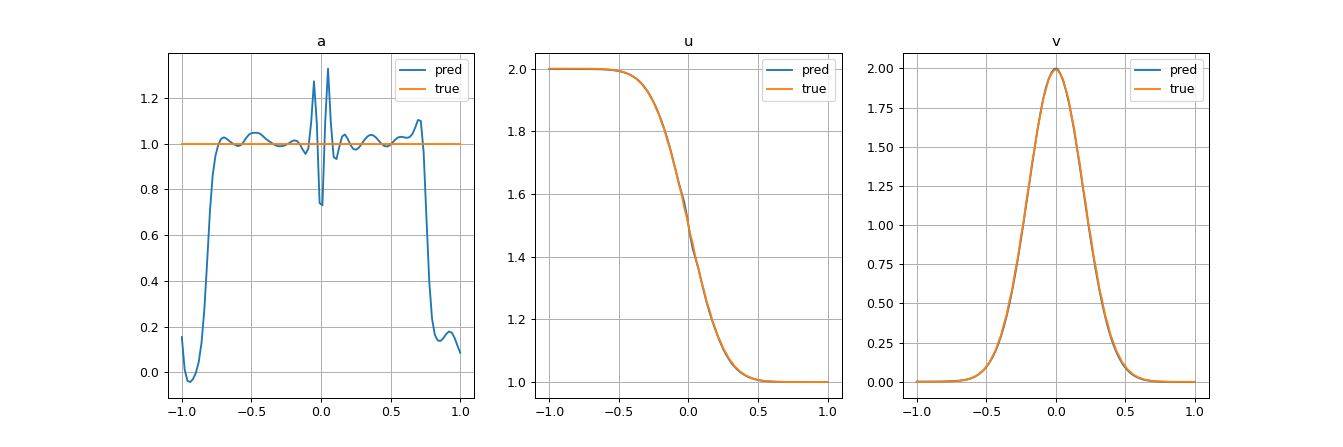

In [6]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: np.ones_like(x)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()